In [319]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import plotly.express as graph
import nltk
import re
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from nltk.stem import WordNetLemmatizer


In [285]:
data1 = pd.read_csv('../data/final_data.csv',delimiter=";")
data = data1.to_numpy()

## Data Analysis

In [286]:
#Shape data
print("Dimensions of Dataset: ",data.shape)
print("\n\n")

#Plotting frequency of different categories
countCategory=data1.type.value_counts()
print('\n')

print("No of posts for each mbti Personality: \n")
print(countCategory)


Dimensions of Dataset:  (106067, 9)





No of posts for each mbti Personality: 

type
INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)




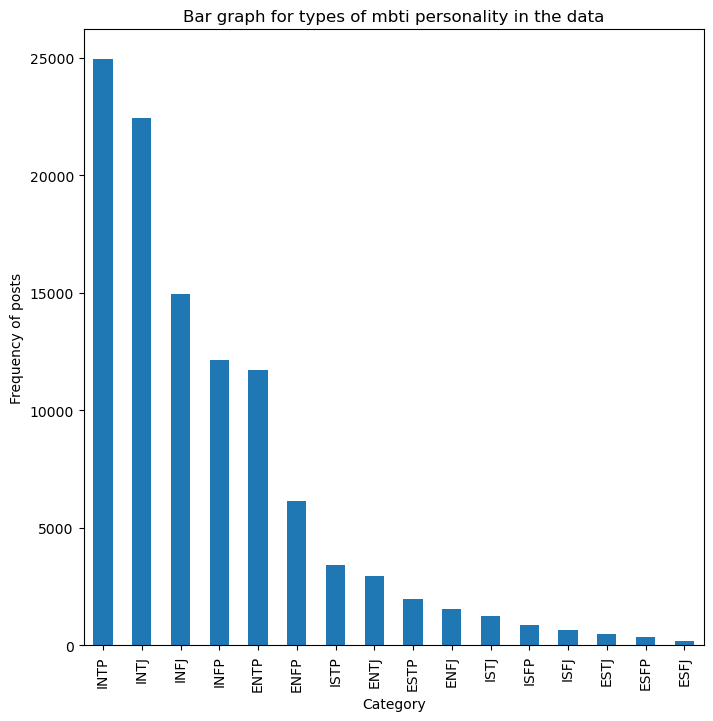

In [287]:
#Frequency vs label graphs
#Bar Graph
print(countCategory.plot(kind='bar',figsize=(8,8),xlabel='Category',ylabel='Frequency of posts', title='Bar graph for types of mbti personality in the data'))
print("\n")
#pie graph
graph.pie(data1,names='type',title='Pie graph for types of mbti personality in the data', height=600, width=600)


## Data Processing

In [288]:
mbti_words =  ['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp', 'isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj',"fe", "fi", "te", "ti", "se", "si", "ne", "ni"]
for i in range(data.shape[0]):
    post_temp=data[i, 1]
    post_temp=" ".join([w for w in post_temp.split(' ') if w not in mbti_words])
    data[i, 1] =  post_temp

In [289]:
remove_words = stopwords.words("english")
for i in range(data.shape[0]):
    post_temp=data[i, 1]
    post_temp=" ".join([w for w in post_temp.split(' ') if w not in remove_words])
    data[i, 1] = post_temp


In [290]:
for i in range(data.shape[0]):
    post_temp=data[i, 1]
    pattern = re.compile('\W+')
    post_temp= re.sub(pattern, ' ', post_temp)
    pattern = re.compile(r'[0-9]')
    post_temp= re.sub(pattern, ' ', post_temp)
    pattern = re.compile(r'[_+]')
    post_temp= re.sub(pattern, ' ', post_temp)
    data[i, 1] = post_temp

<>:3: SyntaxWarning:

invalid escape sequence '\W'

<>:14: SyntaxWarning:

invalid escape sequence '\s'

<>:3: SyntaxWarning:

invalid escape sequence '\W'

<>:14: SyntaxWarning:

invalid escape sequence '\s'

C:\Users\bw443\AppData\Local\Temp\ipykernel_31284\4034217793.py:3: SyntaxWarning:

invalid escape sequence '\W'

C:\Users\bw443\AppData\Local\Temp\ipykernel_31284\4034217793.py:14: SyntaxWarning:

invalid escape sequence '\s'



In [ ]:
#removing extra spaces from texts.
for i in range(data.shape[0]):
    post_temp=data[i, 1]
    pattern = re.compile('\s+')
    post_temp= re.sub(pattern, ' ', post_temp)
    data[i, 1] = post_temp

In [291]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    # Tokenize the text into words
    words = text.split()

    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Recombine the words into a single string
    return " ".join(lemmatized_words)

for i in range(data.shape[0]):
    post_temp = data[i, 1]
    post_temp = lemmatize_text(post_temp)
    data[i, 1] = post_temp

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bw443\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bw443\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [292]:
vectorizer = TfidfVectorizer() #max_features=10000
X = vectorizer.fit_transform(data[:,1])
label_encoder = LabelEncoder()

In [293]:
rationals_labels = data[:,7]
y_rationals = label_encoder.fit_transform(rationals_labels)

irrationals_labels = data[:,8]
y_irrationals = label_encoder.fit_transform(irrationals_labels)

dom_labels = data[:,3]
y_dominant = label_encoder.fit_transform(dom_labels)

aux_labels = data[:,4]
y_auxilary = label_encoder.fit_transform(aux_labels)

ratdom_labels = data[:, 5]
y_ratdominant = label_encoder.fit_transform(ratdom_labels)

irratdom_labels = data[:, 6]
y_irratdominant = label_encoder.fit_transform(irratdom_labels)

## Modeling

In [294]:
undersampler = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)

### Logistic Regression Modeling

#### Rational Functions Logistic Regression Model

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y_rationals, test_size=0.2, random_state=42) # data splitting

# Apply random undersampling to the training set
#X_train, y_train = smote.fit_resample(X_train, y_train)

LR_model = LogisticRegression() # train the model
LR_model.fit(X_train, y_train) # fit the model

LR_preds = LR_model.predict(X_test) # create prediction array

print("trained accuracy score: {:.2f}".format(LR_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(LR_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(LR_preds, y_test, average='micro')))

#78 w/ smote
#78 w/o smote

trained accuracy score: 0.84
tested accuracy score: 0.78
f-score: 0.78


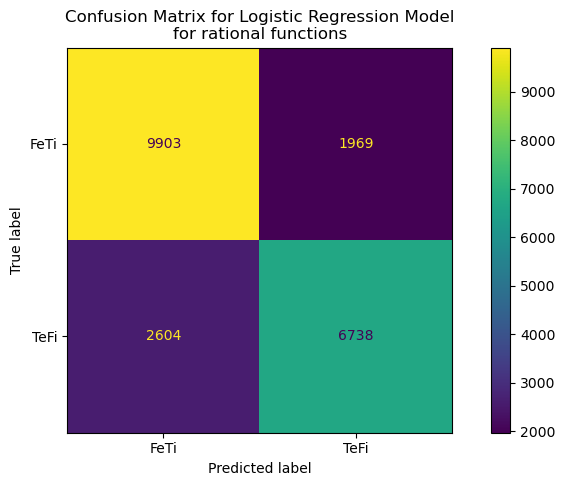

In [296]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, LR_preds, ax=ax)
ax.xaxis.set_ticklabels(["FeTi","TeFi"])
ax.yaxis.set_ticklabels(["FeTi","TeFi"])
_ = ax.set_title(
    f"Confusion Matrix for Logistic Regression Model\nfor rational functions"
)

#### Irrational Functions Logistic Regression Model

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y_irrationals, test_size=0.2, random_state=42)  # data splitting

#X_train, y_train = smote.fit_resample(X_train, y_train)

LR_model = LogisticRegression(class_weight='balanced')  # train the model
LR_model.fit(X_train, y_train)  # fit the model

LR_preds = LR_model.predict(X_test)  # create prediction array

print("trained accuracy score: {:.2f}".format(LR_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(LR_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(LR_preds, y_test, average='micro')))

#79 w/ smote
#79 w/o smote

trained accuracy score: 0.85
tested accuracy score: 0.79
f-score: 0.79


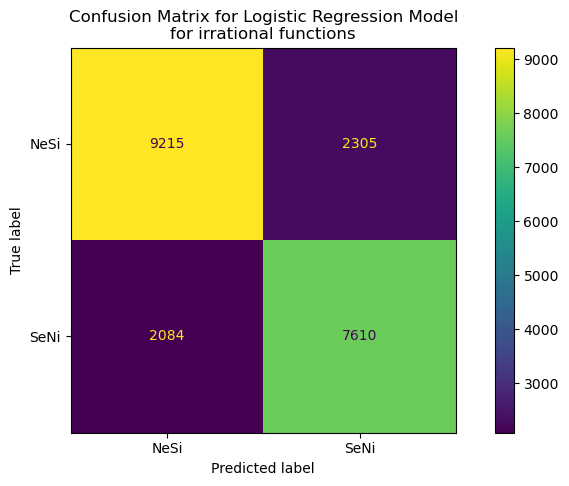

In [298]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, LR_preds, ax=ax)
ax.xaxis.set_ticklabels(["NeSi","SeNi"])
ax.yaxis.set_ticklabels(["NeSi","SeNi"])
_ = ax.set_title(
    f"Confusion Matrix for Logistic Regression Model\nfor irrational functions"
)

#### Dominant Functions Logistic Regression Model


In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y_dominant, test_size=0.2, random_state=42)  # data splitting

# Apply SMOTE to the training set
#X_train, y_train = smote.fit_resample(X_train, y_train)

LR_model = LogisticRegression()  # class_weight='balanced' train the model
LR_model.fit(X_train, y_train)  # fit the model

LR_preds = LR_model.predict(X_test)  # create prediction array

print("trained accuracy score: {:.2f}".format(LR_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(LR_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(LR_preds, y_test, average='micro')))

#73 w/ smote
#73 w/o smote

C:\Users\bw443\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



trained accuracy score: 0.81
tested accuracy score: 0.73
f-score: 0.73


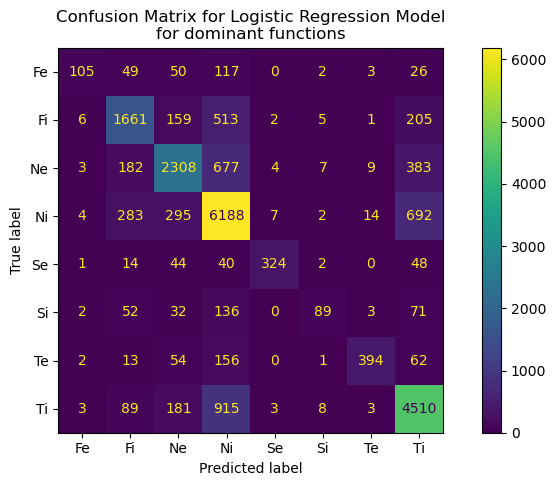

In [300]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, LR_preds, ax=ax)
ax.xaxis.set_ticklabels(["Fe","Fi","Ne","Ni","Se","Si","Te","Ti"])
ax.yaxis.set_ticklabels(["Fe","Fi","Ne","Ni","Se","Si","Te","Ti"])
_ = ax.set_title(
    f"Confusion Matrix for Logistic Regression Model\nfor dominant functions"
)

#### Auxiliary Functions Logistic Regression Model

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y_auxilary, test_size=0.2, random_state=42)  # data splitting

#X_train, y_train = smote.fit_resample(X_train, y_train)

LR_model = LogisticRegression()  # class_weight='balanced' train the model
LR_model.fit(X_train, y_train)  # fit the model

LR_preds = LR_model.predict(X_test)  # create prediction array

print("trained accuracy score: {:.2f}".format(LR_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(LR_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(LR_preds, y_test, average='micro')))

#72 w/ smote
#73 w/o smote

C:\Users\bw443\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



trained accuracy score: 0.81
tested accuracy score: 0.73
f-score: 0.73


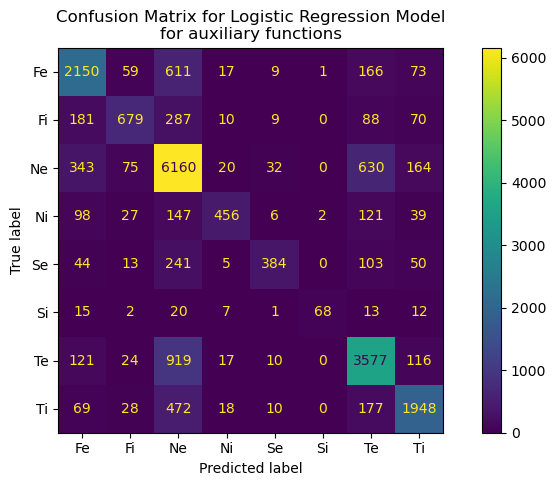

In [302]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, LR_preds, ax=ax)
ax.xaxis.set_ticklabels(["Fe","Fi","Ne","Ni","Se","Si","Te","Ti"])
ax.yaxis.set_ticklabels(["Fe","Fi","Ne","Ni","Se","Si","Te","Ti"])
_ = ax.set_title(
    f"Confusion Matrix for Logistic Regression Model\nfor auxiliary functions"
)

#### Rational Dominant Functions Logistic Regression Model

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ratdominant, test_size=0.2, random_state=42)  # data splitting

# Apply SMOTE to the training set
#X_train, y_train = smote.fit_resample(X_train, y_train)

LR_model = LogisticRegression()  # class_weight='balanced' train the model
LR_model.fit(X_train, y_train)  # fit the model

LR_preds = LR_model.predict(X_test)  # create prediction array

print("trained accuracy score: {:.2f}".format(LR_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(LR_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(LR_preds, y_test, average='micro')))

#78 w/ smote
#78 w/o smote

C:\Users\bw443\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



trained accuracy score: 0.86
tested accuracy score: 0.78
f-score: 0.78


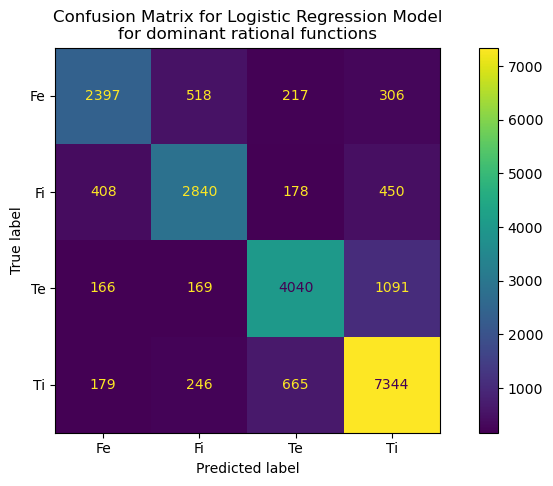

In [304]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, LR_preds, ax=ax)
ax.xaxis.set_ticklabels(["Fe","Fi","Te","Ti"])
ax.yaxis.set_ticklabels(["Fe","Fi","Te","Ti"])
_ = ax.set_title(
    f"Confusion Matrix for Logistic Regression Model\nfor dominant rational functions"
)

#### Irrational Dominant Functions Logistic Regression Model

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y_irratdominant, test_size=0.2, random_state=42)  # data splitting

# Apply SMOTE to the training set
#X_train, y_train = smote.fit_resample(X_train, y_train)

LR_model = LogisticRegression()  # class_weight='balanced' train the model
LR_model.fit(X_train, y_train)  # fit the model

LR_preds = LR_model.predict(X_test)  # create prediction array

print("trained accuracy score: {:.2f}".format(LR_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(LR_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(LR_preds, y_test, average='micro')))

#77 w/ smote
#77 w/o smote

C:\Users\bw443\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



trained accuracy score: 0.85
tested accuracy score: 0.78
f-score: 0.78


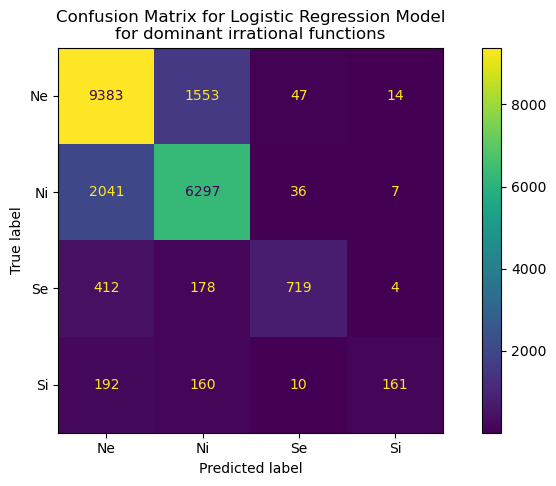

In [306]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, LR_preds, ax=ax)
ax.xaxis.set_ticklabels(["Ne","Ni","Se","Si"])
ax.yaxis.set_ticklabels(["Ne","Ni","Se","Si"])
_ = ax.set_title(
    f"Confusion Matrix for Logistic Regression Model\nfor dominant irrational functions"
)

#### SVM

#### Rational Functions SVM Model

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y_rationals, test_size=0.2, random_state=42)

#X_train, y_train = smote.fit_resample(X_train, y_train)

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)

print("trained accuracy score: {:.2f}".format(svm_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(svm_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(svm_preds, y_test, average='micro')))

#78 w/ smote
#79 w/o smote

trained accuracy score: 0.93
tested accuracy score: 0.79
f-score: 0.79


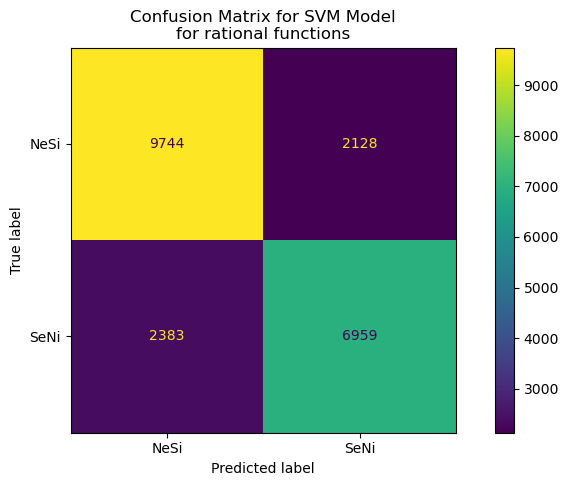

In [308]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, svm_preds, ax=ax)
ax.xaxis.set_ticklabels(["NeSi","SeNi"])
ax.yaxis.set_ticklabels(["NeSi","SeNi"])
_ = ax.set_title(
    f"Confusion Matrix for SVM Model\nfor rational functions"
)

#### Irrational Functions SVM Model

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y_irrationals, test_size=0.2, random_state=42)

#X_train, y_train = smote.fit_resample(X_train, y_train)

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)

print("trained accuracy score: {:.2f}".format(svm_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(svm_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(svm_preds, y_test, average='micro')))

#79 w/ smote
#80 w/o smote

trained accuracy score: 0.93
tested accuracy score: 0.80
f-score: 0.80


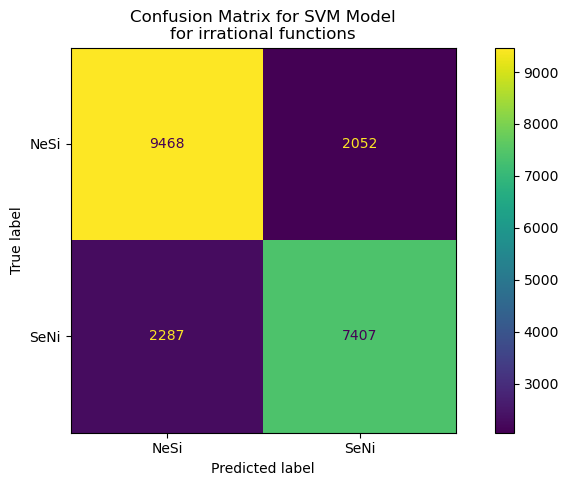

In [310]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, svm_preds, ax=ax)
ax.xaxis.set_ticklabels(["NeSi","SeNi"])
ax.yaxis.set_ticklabels(["NeSi","SeNi"])
_ = ax.set_title(
    f"Confusion Matrix for SVM Model\nfor irrational functions"
)

#### Dominant Functions SVM Model

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y_dominant, test_size=0.2, random_state=42)

#X_train, y_train = smote.fit_resample(X_train, y_train)

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)

print("trained accuracy score: {:.2f}".format(svm_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(svm_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(svm_preds, y_test, average='micro')))

#74 w/ smote
#75 w/o smote

trained accuracy score: 0.95
tested accuracy score: 0.75
f-score: 0.75


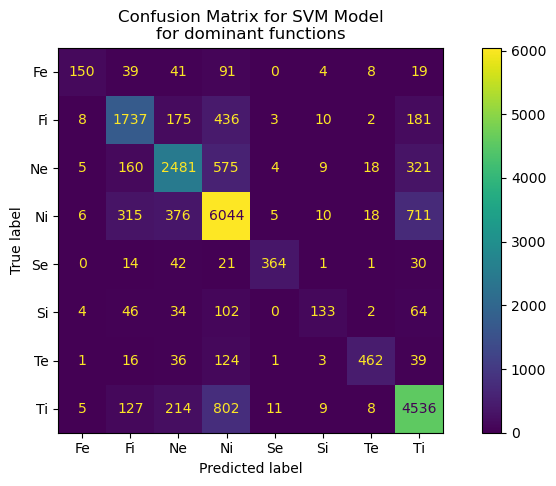

In [312]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, svm_preds, ax=ax)
ax.xaxis.set_ticklabels(["Fe","Fi","Ne","Ni","Se","Si","Te","Ti"])
ax.yaxis.set_ticklabels(["Fe","Fi","Ne","Ni","Se","Si","Te","Ti"])
_ = ax.set_title(
    f"Confusion Matrix for SVM Model\nfor dominant functions"
)

#### Auxiliary Functions SVM Model

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y_auxilary, test_size=0.2, random_state=42)

#X_train, y_train = smote.fit_resample(X_train, y_train)

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)

print("trained accuracy score: {:.2f}".format(svm_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(svm_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(svm_preds, y_test, average='micro')))

#73 w/ smote
#74 w/o smote

trained accuracy score: 0.95
tested accuracy score: 0.74
f-score: 0.74


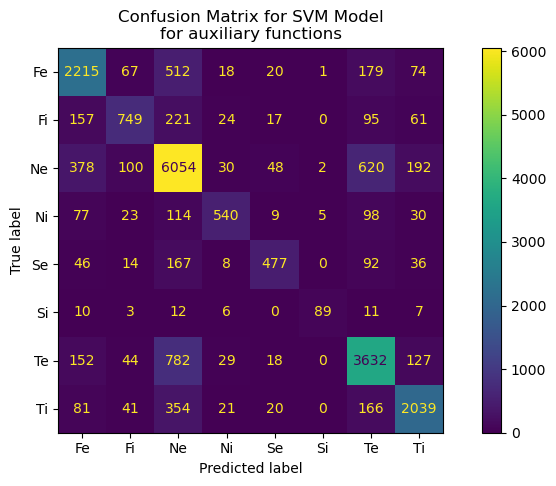

In [314]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, svm_preds, ax=ax)
ax.xaxis.set_ticklabels(["Fe","Fi","Ne","Ni","Se","Si","Te","Ti"])
ax.yaxis.set_ticklabels(["Fe","Fi","Ne","Ni","Se","Si","Te","Ti"])
_ = ax.set_title(
    f"Confusion Matrix for SVM Model\nfor auxiliary functions"
)

#### Dominant Rational Functions SVM Model

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ratdominant, test_size=0.2, random_state=42)

#X_train, y_train = smote.fit_resample(X_train, y_train)

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)

print("trained accuracy score: {:.2f}".format(svm_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(svm_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(svm_preds, y_test, average='micro')))

#78 w/ smote
#79 w/o smote

trained accuracy score: 0.95
tested accuracy score: 0.79
f-score: 0.79


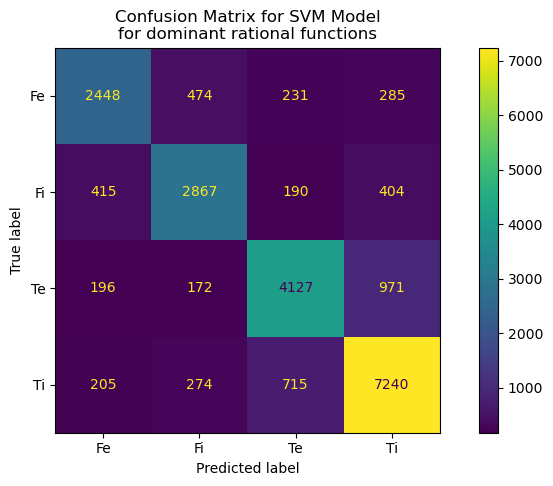

In [316]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, svm_preds, ax=ax)
ax.xaxis.set_ticklabels(["Fe","Fi","Te","Ti"])
ax.yaxis.set_ticklabels(["Fe","Fi","Te","Ti"])
_ = ax.set_title(
    f"Confusion Matrix for SVM Model\nfor dominant rational functions"
)

#### Dominant Irrational Functions SVM Model

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y_irratdominant, test_size=0.2, random_state=42)

#X_train, y_train = smote.fit_resample(X_train, y_train)

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)

print("trained accuracy score: {:.2f}".format(svm_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(svm_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(svm_preds, y_test, average='micro')))

#78 w/ smote
#78 w/o smote

trained accuracy score: 0.94
tested accuracy score: 0.78
f-score: 0.78


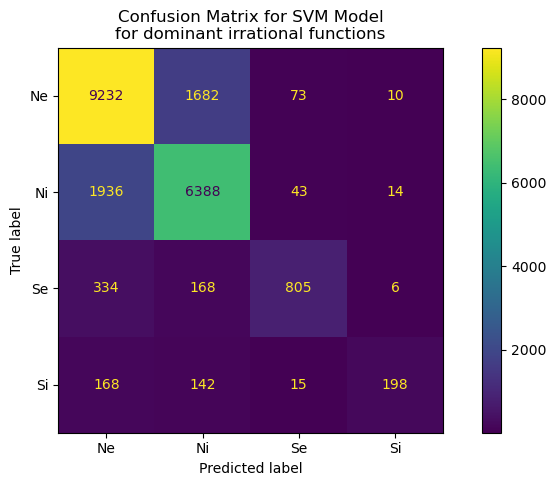

In [323]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, svm_preds, ax=ax)
ax.xaxis.set_ticklabels(["Ne","Ni","Se","Si"])
ax.yaxis.set_ticklabels(["Ne","Ni","Se","Si"])
_ = ax.set_title(
    f"Confusion Matrix for SVM Model\nfor dominant irrational functions"
)